# Assignment: Data Wrangling

In [1]:
! git clone https://github.com/DS3001/wrangling
# ! talks directly to OS

Cloning into 'wrangling'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 75 (delta 27), reused 10 (delta 10), pack-reused 41
Receiving objects: 100% (75/75), 6.25 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (33/33), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about? *This paper explains tidy data, a systematic way of cleaning data designed for compatibility with virtually any dataset.*
  2. Read the introduction. What is the "tidy data standard" intended to accomplish? *Its purpose is to "structure datasets to facilitate analysis." Tidy data also intends to work with real datasets and overcome obstacles typical to them, and a framework for teaching proper data use.*
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." *This statement summarizes the disparity between having a conceptual understanding of the dataset and applying that to an actual structure. We might know what we are trying to observe, but the data have to be structured properly to work with it well.*
  4. Read Section 2.2. How does Wickham define values, variables, and observations? *Values are numbers or strings that are collected in a dataset. A variable is all values measuring the same attribute across units. Observations are all values measured on the same unit.*
  5. How is "Tidy Data" defined in section 2.3? *Tidy data stores each variable in a column, each observation in a row, and each observational unit in a table.*
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset? *The 5 most common problems are column headers as values, multiple variables are stored in one column, variables stored in both rows and columns, multiple types of observational units stored in the same table, and a single observational unit stored in multiple tables. Table 4 is messy because the income variable has its values as columns. Melting a dataset is stacking the dataset, turning columns into rows and tidying it.*
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"? *Table 11 is messy because the date variable is not contained in 1 column, rather it is spread across 31 columns. Table 12 is tidy and molten because these values for date are condensed into 1 column to better convey the data and organize it.*
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling? *The chicken-and-egg problem is that tidy data could only be linked to the tools that are used to tidy data, and neither the concept nor implementation are improved. Wickham hopes that tidying data is more of a framework and the tools will continue improving.*

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
#packages
import numpy as np
import pandas as pd

In [3]:
# Q2.1
#load dataset
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv',low_memory=False)

In [4]:
#define variable
var = 'Price'

In [5]:
#examining variable
df[var].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [6]:
df[var].value_counts()

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: Price, Length: 511, dtype: int64

<Axes: >

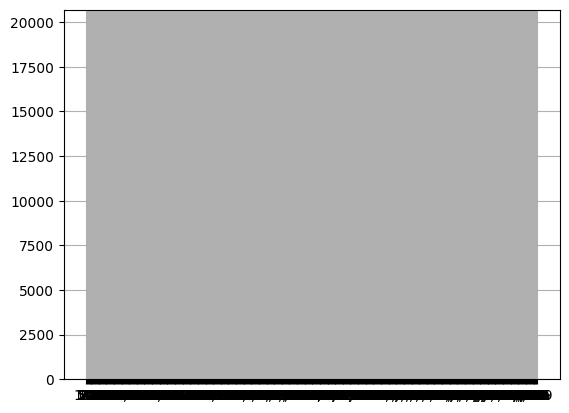

In [7]:
df[var].hist()

In [8]:
#remove the comma and replace with nothing
df[var] = df[var].str.replace(',', '')

In [9]:
#coerce the variable to numeric
df[var] = pd.to_numeric(df[var], errors='coerce')

In [10]:
#examine variable after coercion
df[var].unique()
#no values above 1000, this is an issue

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [11]:
df[var].value_counts()

150     1481
100     1207
200     1059
125      889
75       873
        ... 
840        1
306        1
2695       1
2520       1
291        1
Name: Price, Length: 511, dtype: int64

<Axes: >

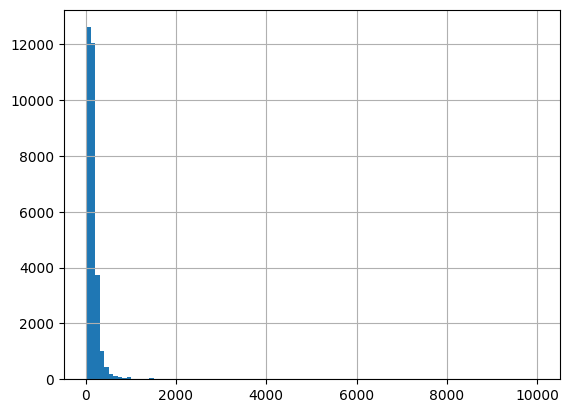

In [16]:
df[var].hist(bins=100)

In [ ]:
# the commas were removed and the variable was coerced to numeric type
# this would make future analysis productive, and now we can see the values above 1,000

In [17]:
# Q2.2
#load dataset
sdf = pd.read_csv('/content/wrangling/assignment/data/sharks.csv',low_memory=False)

In [18]:
#define variable
var = 'Type'

In [20]:
#examining variable
sdf[var].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [21]:
sdf[var].value_counts()
# Unconfirmed should be .d (DK)

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?